In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'sms-spam-collection-dataset' dataset.
Path to dataset files: /kaggle/input/sms-spam-collection-dataset


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv(path + "/spam.csv", encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [28]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("paraphrase-MiniLM-L6-v2")

In [30]:
import nltk
from nltk.tokenize import sent_tokenize

# Download once
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [31]:
# Convert each text to a list of sentences
df["sent_list"] = df["v2"].apply(lambda x: sent_tokenize(x))

In [32]:
df.head()

,v1,v2,sent_list
0,ham,"Go until jurong point, crazy.. Available only ...","[Go until jurong point, crazy.., Available onl..."
1,ham,Ok lar... Joking wif u oni...,"[Ok lar..., Joking wif u oni...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,[Free entry in 2 a wkly comp to win FA Cup fin...
3,ham,U dun say so early hor... U c already then say...,[U dun say so early hor... U c already then sa...
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah I don't think he goes to usf, he lives ar..."


In [33]:
# Generate embeddings for each list of sentences
df["embeddings"] = df["sent_list"].apply(lambda sents: model.encode(sents))

In [34]:
df["embeddings_new"] = df["v2"].apply(lambda sents: model.encode(sents))

In [35]:
le = LabelEncoder()
df["label"] = le.fit_transform(df["v1"])

In [40]:
df['label'].value_counts()

,count
label,
0,4825
1,747


In [36]:
df.head()

,v1,v2,sent_list,embeddings,embeddings_new,label
0,ham,"Go until jurong point, crazy.. Available only ...","[Go until jurong point, crazy.., Available onl...","[[0.6224187, 0.038380943, 0.24896024, -0.27714...","[0.27773997, -0.05374141, 0.20107235, -0.09397...",0
1,ham,Ok lar... Joking wif u oni...,"[Ok lar..., Joking wif u oni...]","[[0.30579233, -0.34385666, 0.17440552, 0.01915...","[-0.1586014, -0.15073238, 0.12741248, -0.19466...",0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,[Free entry in 2 a wkly comp to win FA Cup fin...,"[[0.06936974, 0.22400407, -0.092554994, -0.172...","[-0.13928834, 0.22065958, -0.077553436, -0.125...",1
3,ham,U dun say so early hor... U c already then say...,[U dun say so early hor... U c already then sa...,"[[0.038520433, -0.28503364, 0.08487596, -0.026...","[0.038520433, -0.28503364, 0.08487596, -0.0260...",0
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah I don't think he goes to usf, he lives ar...","[[0.47080663, -0.29304937, -0.02715302, -0.528...","[0.47080663, -0.29304937, -0.02715302, -0.5282...",0


In [37]:
df["embeddings"] = df["embeddings"].apply(
    lambda emb_list: np.mean(np.array(emb_list), axis=0) if isinstance(emb_list[0], (list, np.ndarray)) else np.array(emb_list)
)

In [38]:
df1 = df[['label','embeddings']]
df2= df[['label','embeddings_new']]
df3=df[['label','embeddings','embeddings_new']]

# WITHOUT SMOTE


========================= Dataset 1 (embeddings) =========================

🧠 Naive Bayes Accuracy: 0.9489
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       966
           1       0.77      0.88      0.82       149

    accuracy                           0.95      1115
   macro avg       0.88      0.92      0.90      1115
weighted avg       0.95      0.95      0.95      1115


🧠 Logistic Regression Accuracy: 0.9785
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       966
           1       0.90      0.94      0.92       149

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115


🧠 SVM Accuracy: 0.9758
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       

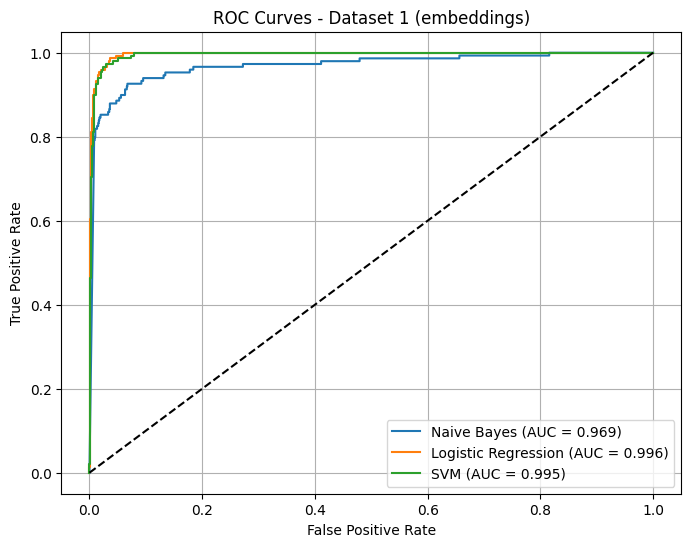


========================= Dataset 2 (embeddings_new) =========================

🧠 Naive Bayes Accuracy: 0.9534
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       966
           1       0.78      0.91      0.84       149

    accuracy                           0.95      1115
   macro avg       0.88      0.93      0.91      1115
weighted avg       0.96      0.95      0.95      1115


🧠 Logistic Regression Accuracy: 0.9857
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.95      0.94      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115


🧠 SVM Accuracy: 0.9830
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99   

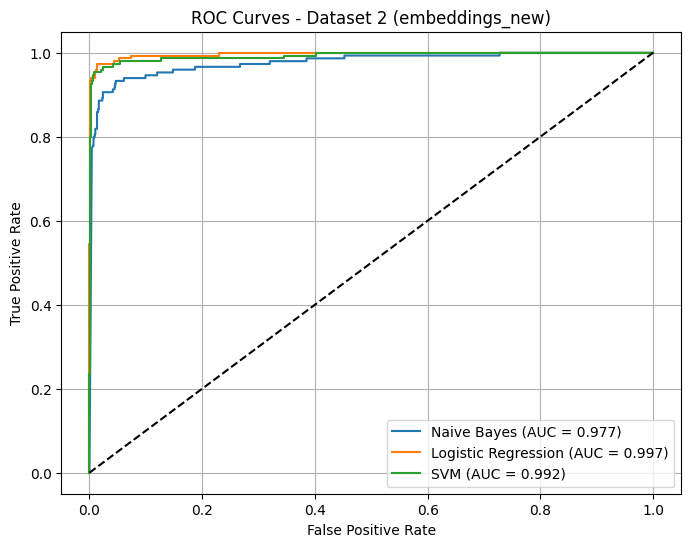


========================= Dataset 3 (combined embeddings) =========================

🧠 Naive Bayes Accuracy: 0.9525
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       966
           1       0.78      0.91      0.84       149

    accuracy                           0.95      1115
   macro avg       0.88      0.93      0.90      1115
weighted avg       0.96      0.95      0.95      1115


🧠 Logistic Regression Accuracy: 0.9883
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.96      0.95      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115


🧠 SVM Accuracy: 0.9830
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.

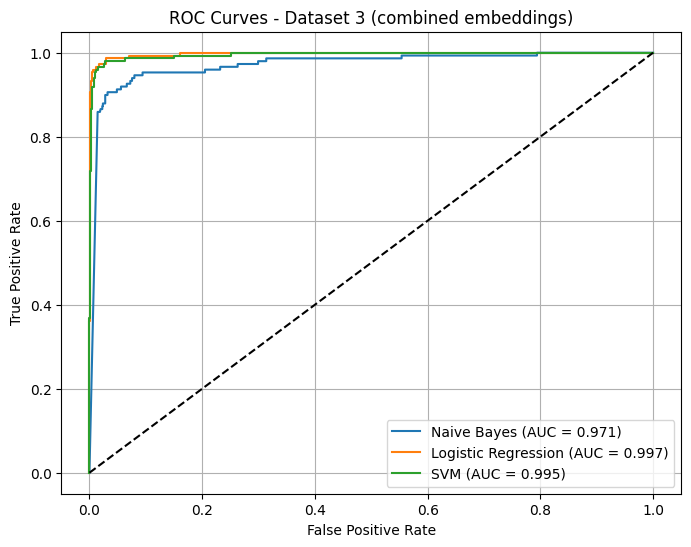

In [44]:
def train_and_evaluate(df, name):
    print(f"\n{'='*25} {name} {'='*25}")

    if 'embeddings' in df.columns and 'embeddings_new' in df.columns:
        X = np.array([
            np.concatenate((np.array(e1), np.array(e2)))
            for e1, e2 in zip(df['embeddings'], df['embeddings_new'])
        ])
    elif 'embeddings' in df.columns:
        X = np.array(df['embeddings'].to_list())
    else:
        X = np.array(df['embeddings_new'].to_list())

    y = df['label'].values

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    models = {
        "Naive Bayes": GaussianNB(),
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "SVM": SVC(kernel='linear', probability=True)
    }

    plt.figure(figsize=(8,6))  # ROC plot

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        print(f"\n🧠 {model_name} Accuracy: {acc:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        # ROC Curve
        y_prob = model.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')


    plt.plot([0,1], [0,1], 'k--')
    plt.title(f'ROC Curves - {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

train_and_evaluate(df1, "Dataset 1 (embeddings)")
train_and_evaluate(df2, "Dataset 2 (embeddings_new)")
train_and_evaluate(df3, "Dataset 3 (combined embeddings)")


# OVERSAMPLED USING SMOTE


========================= Dataset 1 (embeddings) =========================
Before SMOTE: [3859  598]
After SMOTE:  [3859 3859]

🧠 Naive Bayes Accuracy: 0.9543
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       966
           1       0.84      0.82      0.83       149

    accuracy                           0.95      1115
   macro avg       0.90      0.90      0.90      1115
weighted avg       0.95      0.95      0.95      1115


🧠 Logistic Regression Accuracy: 0.9695
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       966
           1       0.83      0.97      0.89       149

    accuracy                           0.97      1115
   macro avg       0.91      0.97      0.94      1115
weighted avg       0.97      0.97      0.97      1115


🧠 SVM Accuracy: 0.9632
Classification Report:
              precision    recall  f1-score   support

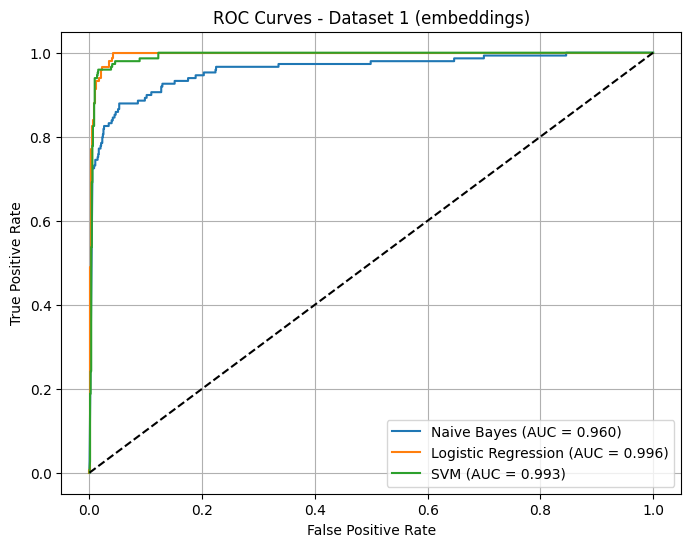


========================= Dataset 2 (embeddings_new) =========================
Before SMOTE: [3859  598]
After SMOTE:  [3859 3859]

🧠 Naive Bayes Accuracy: 0.9623
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       966
           1       0.84      0.89      0.86       149

    accuracy                           0.96      1115
   macro avg       0.91      0.93      0.92      1115
weighted avg       0.96      0.96      0.96      1115


🧠 Logistic Regression Accuracy: 0.9839
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.92      0.97      0.94       149

    accuracy                           0.98      1115
   macro avg       0.96      0.98      0.97      1115
weighted avg       0.98      0.98      0.98      1115


🧠 SVM Accuracy: 0.9803
Classification Report:
              precision    recall  f1-score   sup

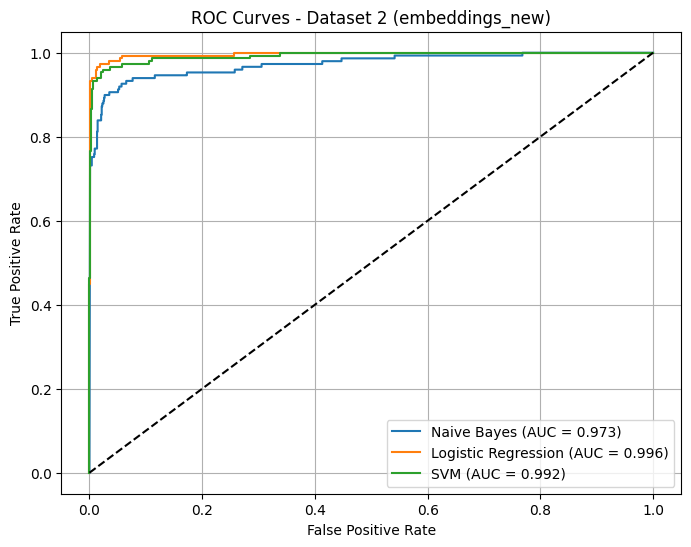


========================= Dataset 3 (combined embeddings) =========================
Before SMOTE: [3859  598]
After SMOTE:  [3859 3859]

🧠 Naive Bayes Accuracy: 0.9614
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       966
           1       0.86      0.85      0.85       149

    accuracy                           0.96      1115
   macro avg       0.92      0.91      0.92      1115
weighted avg       0.96      0.96      0.96      1115


🧠 Logistic Regression Accuracy: 0.9839
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.92      0.97      0.94       149

    accuracy                           0.98      1115
   macro avg       0.96      0.98      0.97      1115
weighted avg       0.98      0.98      0.98      1115


🧠 SVM Accuracy: 0.9830
Classification Report:
              precision    recall  f1-score 

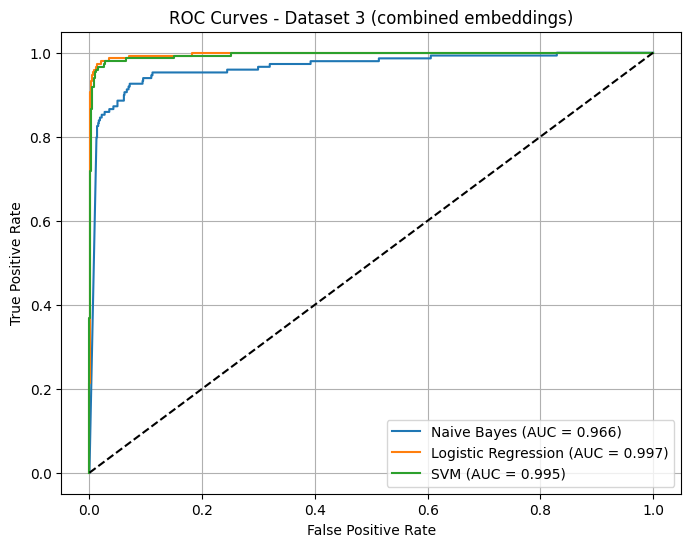

In [43]:
def train_and_evaluate(df, name):
    print(f"\n{'='*25} {name} {'='*25}")

    if 'embeddings' in df.columns and 'embeddings_new' in df.columns:

        X = np.array([
            np.concatenate((np.array(e1), np.array(e2)))
            for e1, e2 in zip(df['embeddings'], df['embeddings_new'])
        ])
    elif 'embeddings' in df.columns:
        X = np.array(df['embeddings'].to_list())
    else:
        X = np.array(df['embeddings_new'].to_list())

    y = df['label'].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    print(f"Before SMOTE: {np.bincount(y_train)}")
    print(f"After SMOTE:  {np.bincount(y_train_res)}")

    models = {
        "Naive Bayes": GaussianNB(),
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "SVM": SVC(kernel='linear', probability=True)
    }

    plt.figure(figsize=(8,6))

    for model_name, model in models.items():
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]
        acc = accuracy_score(y_test, y_pred)
        print(f"\n🧠 {model_name} Accuracy: {acc:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')


    plt.plot([0,1], [0,1], 'k--')
    plt.title(f'ROC Curves - {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

train_and_evaluate(df1, "Dataset 1 (embeddings)")
train_and_evaluate(df2, "Dataset 2 (embeddings_new)")
train_and_evaluate(df3, "Dataset 3 (combined embeddings)")
